In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# locate rows of duplicate data
from pandas import read_csv
# load the dataset iris.csv
df = read_csv('/content/drive/MyDrive/Labs_Data_Prep_2025_IA/Lab6_iris/iris.csv', header=None)
df.head()


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print(df.shape)

(150, 5)


In [4]:
# calculate duplicates
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


In [5]:
df[df.duplicated()]

,0,1,2,3,4
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [6]:
#Supprimer les lignes en doublons
df.drop_duplicates(inplace=True)

In [7]:
df.shape


(147, 5)

In [8]:
# seed the random number generator
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
seed(1)
data = 5 * randn(10000) + 50
print(' mean=%.3f stdv=%.3f' % (mean(data), std(data)))

 mean=50.049 stdv=4.994


In [9]:
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [10]:
# identify outliers
outliers = [x for x in data if x < lower or x > upper]

In [11]:
# remove outliers
outliers_removed = [x for x in data if x > lower and x < upper]

# Notebook 2

In [12]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
seed(1)

In [13]:
# generate univariate observations
data = 5 * randn(10000) + 50

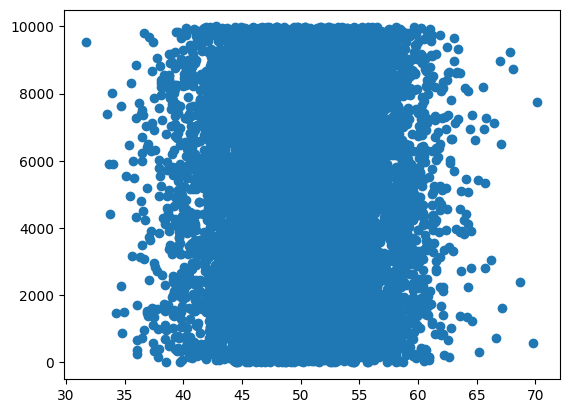

In [14]:
#Les nuages de points
y_data = np.arange(len(data))
plt.scatter(data,y_data)
plt.show()

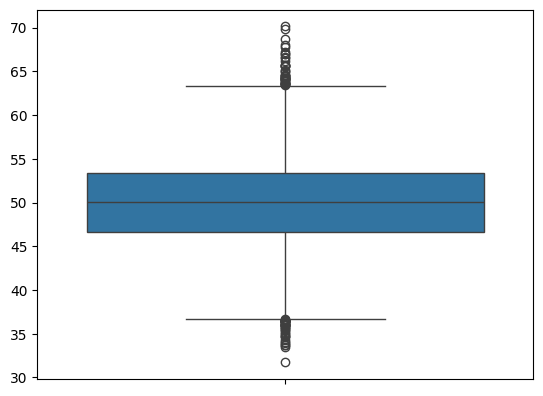

In [15]:
sns.boxplot(data);

In [16]:
# On calcule le quantile 0,25 qui est le quartile Q1
Q1 = np.percentile(data,25)
print("Quartile Q1 vaut : ", Q1)

Quartile Q1 vaut :  46.685375790489445


In [17]:
# On calcule le quantile 0,75 qui est le quartile Q3
Q3 = np.percentile(data,75)
print("Quartile Q3 vaut : ", Q3)

Quartile Q3 vaut :  53.35904417735179


In [18]:
cut_off = 1.5*(Q3-Q1)
upper=Q3+cut_off
lower=Q1-cut_off
print('lower=%.3f , upper=%.3f ' % (lower, upper))

lower=36.675 , upper=63.370 


In [19]:
outliers=[x for x in data if x<lower or x> upper]

print('Identified outliers: %d' % len(outliers))

Identified outliers: 81


In [20]:
outliers_removed = [x for x in data if x >= lower and x <= upper] #Ce que je veux garder
print('Non-outlier observations: % d' % len(outliers_removed))

Non-outlier observations:  9919


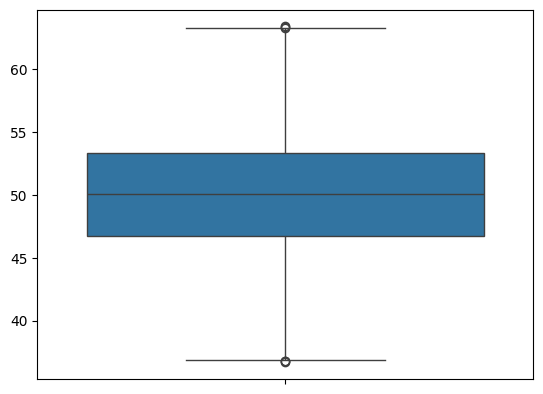

In [21]:
#Affiche le boxplot
sns.boxplot(outliers_removed);

## Multivariable

In [22]:

# Generate multivariate data with outliers
from numpy.random import seed
from numpy.random import randn
import numpy as np
import pandas as pd

seed(1)

# Number of variables and observations
n_variables = 4
n_observations = 1000

# Generate multivariate data
data_multivariate = 5 * randn(n_observations, n_variables) + 50

# Introduce outliers
# Example: Add some extreme values to the first variable
outlier_indices = np.random.choice(n_observations, size=50, replace=False)  # 50 outliers
data_multivariate[outlier_indices, 0] = data_multivariate[outlier_indices, 0] + 100

# Create a Pandas DataFrame for better handling
df = pd.DataFrame(data_multivariate, columns=[f"Variable_{i+1}" for i in range(n_variables)])

# Display the first few rows of the DataFrame
print(df.head())


   Variable_1  Variable_2  Variable_3  Variable_4
0   58.121727   46.941218   47.359141   44.635157
1   54.327038   38.492307   58.724059   46.193965
2   51.595195   48.753148   57.310540   39.699296
3   48.387914   48.079728   55.668847   44.500544
4   49.137859   45.610708   50.211069   52.914076


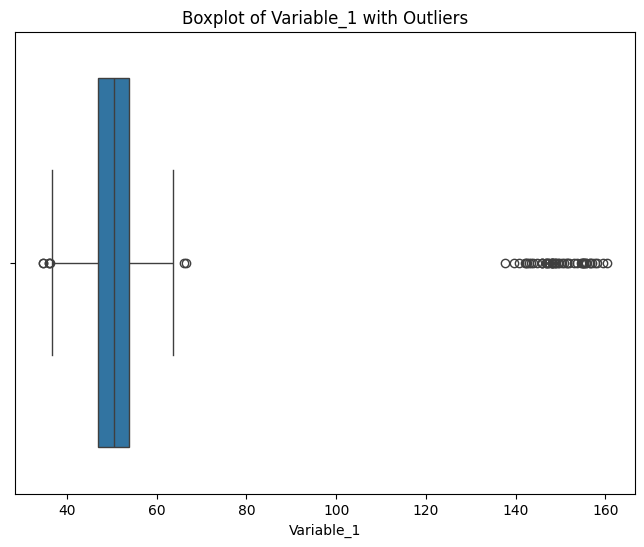

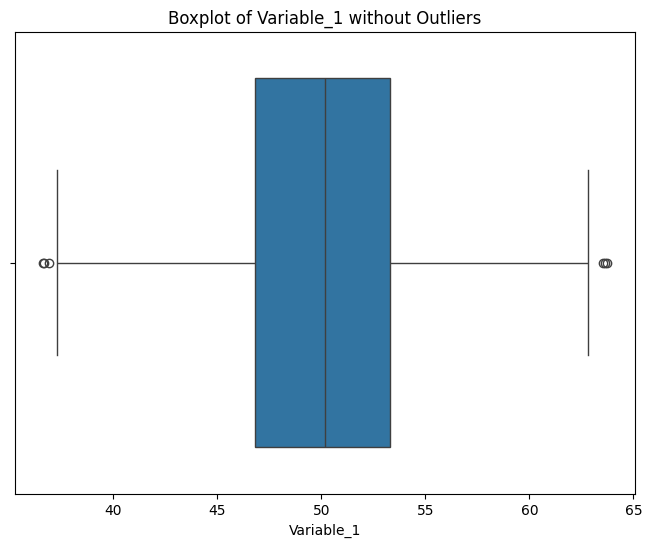

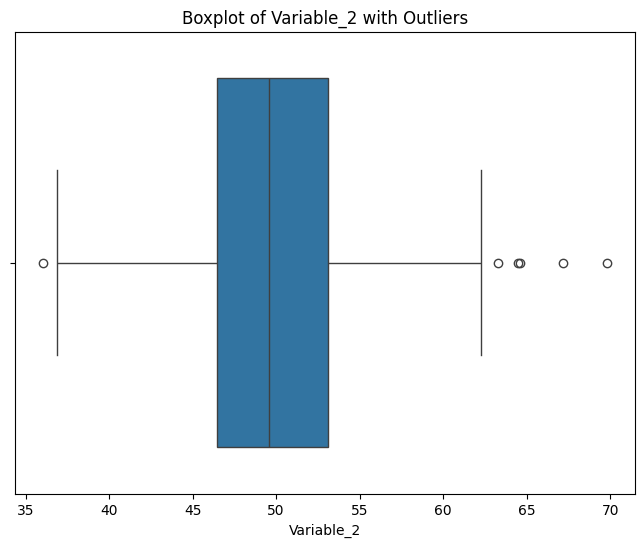

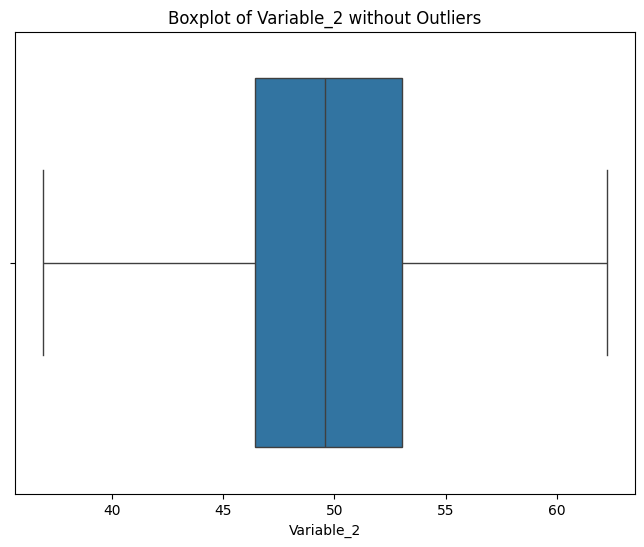

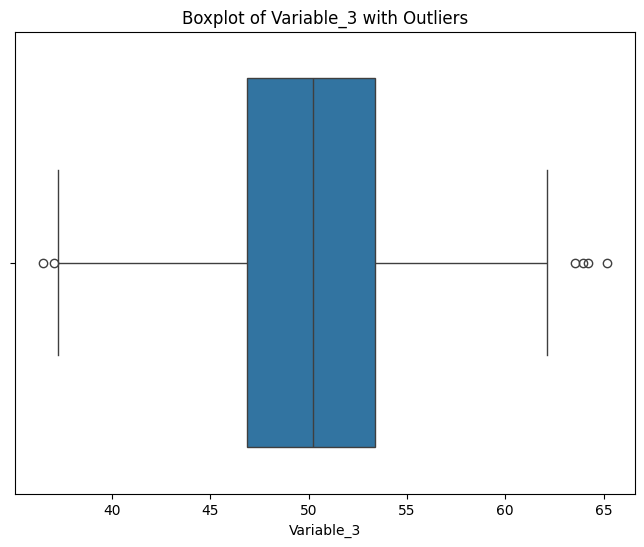

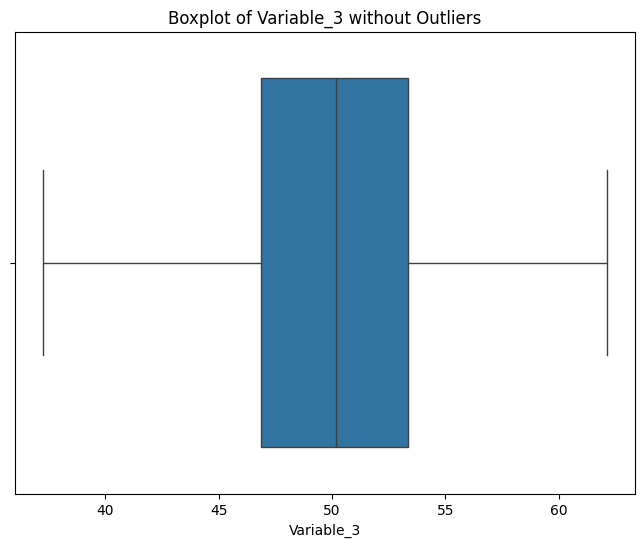

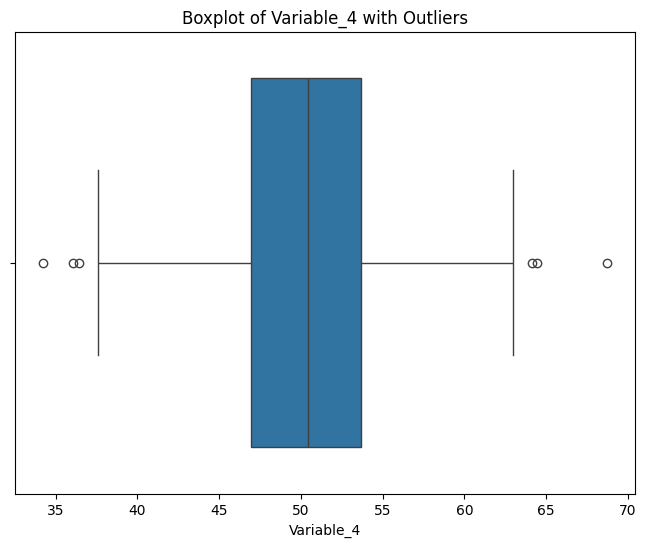

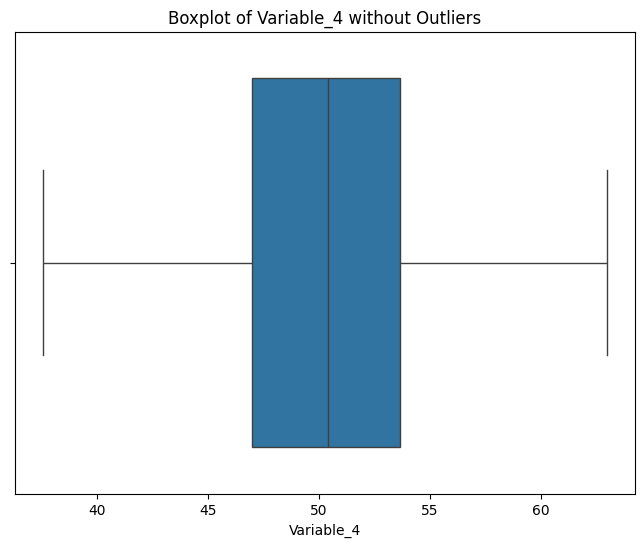

   Variable_1  Variable_2  Variable_3  Variable_4
0   58.121727   46.941218   47.359141   44.635157
1   54.327038   38.492307   58.724059   46.193965
2   51.595195   48.753148   57.310540   39.699296
3   48.387914   48.079728   55.668847   44.500544
4   49.137859   45.610708   50.211069   52.914076


In [23]:

import matplotlib.pyplot as plt
# Function to identify and remove outliers from a Pandas DataFrame column
def remove_outliers_from_column(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_no_outliers

# Plot boxplots for each variable and remove outliers
for col in df.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} with Outliers')
    plt.show()

    df = remove_outliers_from_column(df, col)  # Remove outliers from the DataFrame

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} without Outliers')
    plt.show()

# Display the cleaned DataFrame
print(df.head())


# Notebook 3

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [25]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
df = read_csv('/content/drive/MyDrive/Labs_Data_Prep_2025_IA/Lab6_iris/housing.csv', header=None)
# retrieve the array
data = df.values

In [26]:

X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)

(506, 13) (506,)


In [27]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 13) (167, 13) (339,) (167,)


In [28]:
# identify outliers in the training dataset en utilisant  LocalOutlierFactor()
lof=LocalOutlierFactor(n_neighbors=20,contamination=0.1)
yhat = lof.fit_predict(X_train)

In [29]:
mask = yhat != -1 # select all rows that are not outliers
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape
print(X_train.shape, y_train.shape)

(305, 13) (305,)


In [30]:

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f ' % mae)

MAE: 3.356 


### Commentaire
* Il faut aussi entrainer le model sur les donnees brutes sans enlever les outliers pour voir la difference

In [31]:
#Faisons l'entrainement et l'evaluation du model sans supprimer les Outliers

data=read_csv('/content/drive/MyDrive/Labs_Data_Prep_2025_IA/Lab6_iris/housing.csv', header=None)
# retrieve the array
data = data.values

In [32]:
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)

(506, 13) (506,)


In [33]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 13) (167, 13) (339,) (167,)


In [34]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f ' % mae)

MAE: 3.417 


## Commentaire:
*  Nous observons que si nous entrainer notre model sur les donnees sans supprimer les outliers, je trouve un MAE=3.417
*  Par contre si on utilise le LOF pour delete les outliers on trouve un MAE =3.356

### On conclut que si nous traitons les cas des outliers les performances ne notre model s'accroit.